# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '392' # Japan
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '344', 'rDesc': 'China, Hong Kong SAR', 'ps': '201912', 'TotalRecords': 139319, 'isOriginal': 1, 'publicationDate': '2020-02-08T00:00:00', 'isPartnerDetail': 1}]


# CTH2

In [4]:
cc = 'AG2' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df2 = tta.prepare(data)

{'r': '699', 'p': '344', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': '344', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


In [5]:
df2['QR'] = df2['quantity_a'] / df2['quantity_b']
df2['VR'] = df2['value_a'] / df2['value_b']
df2.sort_values(by=['code'])

code                                               desc  quantity_a  \
01   01                                      Animals; live           0   
03   03  Fish and crustaceans, molluscs and other aquat...           0   
05   05  Animal originated products; not elsewhere spec...           0   
06   06  Trees and other plants, live; bulbs, roots and...           0   
08   08  Fruit and nuts, edible; peel of citrus fruit o...           0   
09   09                       Coffee, tea, mate and spices           0   
10   10                                            Cereals           0   
11   11  Products of the milling industry; malt, starch...           0   
12   12  Oil seeds and oleaginous fruits; miscellaneous...           0   
13   13  Lac; gums, resins and other vegetable saps and...           0   
14   14  Vegetable plaiting materials; vegetable produc...           0   
15   15  Animal or vegetable fats and oils and their cl...           0   
17   17                     Sugars and sugar confectionery           0   
18   18                       Cocoa and cocoa preparations           0   
19   19  Preparations of cereals, flour, starch or milk...           0   
20   20  Preparations of vegetables, fruit, nuts or oth...           0   
21   21                  Miscellaneous edible preparations           0   
22   22                     Beverages, spirits and vinegar           0   
23   23  Food industries, residues and wastes thereof; ...           0   
24   24       Tobacco and manufactured tobacco substitutes           0   
25   25  Salt; sulphur; earths, stone; plastering mater...           0   
26   26                                 Ores, slag and ash           0   
27   27  Mineral fuels, mineral oils and products of th...           0   
28   28  Inorganic chemicals; organic and inorganic com...           0   
29   29                                  Organic chemicals           0   
30   30                            Pharmaceutical products           0   
31   31                                        Fertilizers           0   
32   32  Tanning or dyeing extracts; tannins and their ...           0   
33   33  Essential oils and resinoids; perfumery, cosme...           0   
34   34  Soap, organic surface-active agents; washing, ...           0   
35   35  Albuminoidal substances; modified starches; gl...           0   
36   36  Explosives; pyrotechnic products; matches; pyr...           0   
37   37              Photographic or cinematographic goods           0   
38   38                           Chemical products n.e.c.           0   
39   39                      Plastics and articles thereof           0   
40   40                        Rubber and articles thereof           0   
41   41  Raw hides and skins (other than furskins) and ...           0   
42   42  Articles of leather; saddlery and harness; tra...           0   
43   43  Furskins and artificial fur; manufactures thereof           0   
44   44           Wood and articles of wood; wood charcoal           0   
45   45                          Cork and articles of cork           0   
46   46  Manufactures of straw, esparto or other plaiti...           0   
47   47  Pulp of wood or other fibrous cellulosic mater...           0   
48   48  Paper and paperboard; articles of paper pulp, ...           0   
49   49  Printed books, newspapers, pictures and other ...           0   
50   50                                               Silk           0   
51   51  Wool, fine or coarse animal hair; horsehair ya...           0   
52   52                                             Cotton           0   
53   53  Vegetable textile fibres; paper yarn and woven...           0   
54   54  Man-made filaments; strip and the like of man-...           0   
55   55                             Man-made staple fibres           0   
56   56  Wadding, felt and nonwovens, special yarns; tw...           0   
57   57          Carpets and other textile floor coverings           0   
58   58

In [6]:
df2.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH4

In [7]:
cc = 'AG4' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df4 = tta.prepare(data)

{'r': '699', 'p': '344', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '344', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [8]:
df4['QR'] = df4['quantity_a'] / df4['quantity_b']
df4['VR'] = df4['value_a'] / df4['value_b']
df4.sort_values(by=['code'])

code                                               desc  quantity_a  \
0101  0101             Horses, asses, mules and hinnies; live           0   
0301  0301                                         Fish; live         400   
0305  0305  Fish, dried, salted or in brine; smoked fish, ...           0   
0307  0307  Molluscs; whether in shell or not, live, fresh...       20100   
0505  0505  Skins and other parts of birds with feathers, ...          16   
0508  0508  Coral and similar materials, unworked or simpl...       16431   
0511  0511  Animal products not elsewhere specified or inc...       43358   
0603  0603  Flowers; cut flowers and flower buds of a kind...         140   
0604  0604  Foliage, branches and other parts of plants, w...       12277   
0801  0801  Nuts, edible; coconuts, Brazil nuts and cashew...     4765483   
0802  0802  Nuts (excluding coconuts, Brazils and cashew n...     6376836   
0805  0805                       Citrus fruit; fresh or dried       58492   
0806  0806                             Grapes; fresh or dried       35544   
0810  0810                 Fruit, fresh; n.e.c. in chapter 08       78000   
0813  0813  Fruit, dried, other than that of heading no. 0...           0   
0901  0901  Coffee, whether or not roasted or decaffeinate...         134   
0902  0902                                                Tea         312   
0907  0907             Cloves (whole fruit, cloves and stems)       16000   
0910  0910  Ginger, saffron, tumeric (curcuma), thyme, bay...         110   
1008  1008  Buckwheat, millet and canary seeds; other cereals           0   
1109  1109                 Wheat gluten; whether or not dried       44000   
1209  1209  Seeds, fruit and spores; of a kind used for so...         812   
1210  1210  Hop cones, fresh or dried, whether or not grou...        7905   
1211  1211  Plants and parts of plants (including seeds an...          50   
1302  1302  Vegetable saps and extracts; pectic substances...        2274   
1401  1401  Vegetable materials of a kind used primarily f...      374650   
1505  1505  Wool grease and fatty substances derived there...           0   
1516  1516  Animal or vegetable fats and oils and their fr...       17000   
1520  1520  Glycerol, crude; glycerol waters and glycerol ...      105000   
1702  1702  Sugars, including lactose, maltose, glucose or...       25300   
1704  1704  Sugar confectionery (including white chocolate...        2662   
1806  1806  Chocolate and other food preparations containi...          65   
1902  1902  Pasta; whether or not cooked or stuffed with m...           4   
1905  1905  Bread, pastry, cakes, biscuits, other bakers' ...         101   
2005  2005  Vegetables preparations n.e.c.; prepared or pr...        4000   
2006  2006  Vegetables, fruit, nuts, fruit-peel and other ...        5000   
2008  2008  Fruit, nuts and other edible parts of plants; ...        5900   
2009  2009  Fruit juices (including grape must) and vegeta...       10902   
2101  2101  Extracts, essences, concentrates of coffee, te...          65   
2102  2102  Yeasts (active or inactive); other single-cell...     1136310   
2106  2106  Food preparations not elsewhere specified or i...      101810   
2201  2201  Waters, including natural or artificial minera...         387   
2202  2202  Waters, including mineral and aerated waters, ...        1262   
2203  2203                                Beer made from malt       33930   
2204  2204  Wine of fresh grapes, including fortified wine...        2336   
2208  2208  Ethyl alcohol, undenatured; of an alcoholic st...       19397   
2306  2306  Oil-cake and other solid residues; whether or ...      345954   
2309  2309      Preparations of a kind used in animal feeding      220509   
2402  2402  Cigars, cheroots, cigarillos and cigarettes; o...       11689   
2403  2403  Manufactured tobacco and manufactured tobacco ...        5046   
2501  2501  Salt (including table salt and denatured salt)...      894000   
25

In [9]:
df4.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH6

In [10]:
cc = 'AG6' # AG2, AG4, AG6
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df6 = tta.prepare(data)

{'r': '699', 'p': '344', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '344', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [11]:
df6['QR'] = df6['quantity_a'] / df6['quantity_b']
df6['VR'] = df6['value_a'] / df6['value_b']
df6.sort_values(by=['code'])

code                                               desc  quantity_a  \
010190  010190                            Mules and hinnies; live           0   
030199  030199                 Fish; live, n.e.c. in heading 0301         400   
030572  030572     Fish; edible offal, fish heads, tails and maws           0   
030743  030743  Molluscs; cuttle fish and squid, whether in sh...       20100   
050510  050510  Animal products; feathers and down used for st...          16   
050800  050800  Animal products; coral and similar materials, ...       16431   
051191  051191  Animal products; of fish or crustaceans, mollu...           0   
051199  051199               Animal products; n.e.c. in chapter 5       43358   
060390  060390  Flowers, cut; flowers and flower buds of a kin...         140   
060490  060490  Foliage, branches and other parts of plants, w...       12277   
080131  080131  Nuts, edible; cashew nuts, fresh or dried, in ...     4765483   
080211  080211    Nuts, edible; almonds, fresh or dried, in shell     5649331   
080212  080212     Nuts, edible; almonds, fresh or dried, shelled           0   
080251  080251  Nuts, edible; pistachios, fresh or dried, in s...      717505   
080252  080252  Nuts, edible; pistachios, fresh or dried, shelled       10000   
080540  080540  Fruit, edible; grapefruit, including pomelos, ...       58492   
080610  080610                       Fruit, edible; grapes, fresh       35544   
081050  081050                    Fruit, edible; kiwifruit, fresh       24000   
081090  081090  Fruit, edible; fruits n.e.c. in heading no. 08...       54000   
081340  081340  Fruit, edible; fruit n.e.c. in heading no. 081...           0   
090190  090190  Coffee; husks and skins, coffee substitutes co...         134   
090220  090220  Tea, green; (not fermented), in immediate pack...         312   
090240  090240  Tea, black; (fermented) and partly fermented t...           0   
090710  090710  Spices; cloves (whole fruit, cloves and stems)...       16000   
091020  091020                                    Spices; saffron         110   
100850  100850               Cereals; quinoa (Chenopodium quinoa)           0   
110900  110900                 Wheat gluten; whether or not dried       44000   
120991  120991  Seeds; vegetable seeds, of a kind used for sowing         812   
121020  121020  Hop cones; ground, powdered or in the form of ...        7905   
121190  121190  Plants and parts (including seeds and fruits) ...          50   
130213  130213               Vegetable saps and extracts; of hops         523   
130219  130219  Vegetable saps and extracts; n.e.c. in item no...         501   
130231  130231  Mucilages and thickeners; agar-agar, whether o...          50   
130232  130232  Mucilages and thickeners; whether or not modif...        1200   
140110  140110                 Bamboo used primarily for plaiting      374560   
140120  140120                Rattans used primarily for plaiting          90   
150500  150500  Wool grease and fatty substances derived there...           0   
151620  151620  Vegetable fats and oils and their fractions; p...       17000   
152000  152000  Glycerol, crude; glycerol waters and glycerol ...      105000   
170211  170211  Sugars; lactose and lactose syrup, containing ...       25300   
170490  170490  Sugar confectionery; (excluding chewing gum, i...        2662   
180690  180690  Chocolate and other food preparations containi...          65   
190219  190219  Food preparations; pasta, uncooked (excluding ...           4   
190590  190590  Food preparations; bakers' wares n.e.c. in hea...         101   
200559  200559  Vegetable preparations; beans, (not shelled), ...        4000   
200600  200600  Vegetables, fruit, nuts, fruit-peel and other ...        5000   
200819  200819  Nuts and other seeds; whether or not containin...        5900   
200979  200979  Juice; apple, of a Brix value exceeding 20, un...       10902   
210112  210112  Preparations with a basis

In [12]:
df6.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Summary

In [13]:
print("Total import, as per reporter data:", df2['value_a'].sum(), " million USD.")
print("Total export, as per partner data:", df2['value_b'].sum(), " million USD.")

Total import, as per reporter data: 17385.600000000002  million USD.
Total export, as per partner data: 15494.08  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%. You can change the value to better fit the data.

In [14]:
percentage_cutoff = 20 # value to filter
value_diff_cutoff = 20 # value to filter

df = df6 # Change to required data_frame
df = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
df.sort_values(by=['value_diff_abs'], ascending=False)

code                                               desc  quantity_a  \
854231  854231  Electronic integrated circuits; processors and...           0   
851770  851770  Telephone sets and other apparatus for the tra...    27304046   
710239  710239  Diamonds; non-industrial, (other than unworked...         570   
854239  854239  Electronic integrated circuits; n.e.c. in head...           0   
710399  710399  Stones; precious (other than diamonds) and sem...       41264   
854232  854232           Electronic integrated circuits; memories      805063   
852990  852990  Reception and transmission apparatus; for use ...           0   
852580  852580  Television cameras, digital cameras and video ...     1133055   
854290  854290            Parts of electronic integrated circuits      111106   
710490  710490  Stones; precious or semi-precious, synthetic o...      151853   
847130  847130  Automatic data processing machines; portable, ...     1390631   
710420  710420  Stones; precious or semi-precious, synthetic o...       22320   
851769  851769  Communication apparatus (excluding telephone s...           0   
847330  847330  Machinery; parts and accessories (other than c...           0   
851762  851762  Communication apparatus (excluding telephone s...     1257005   
710391  710391  Stones; rubies, sapphires and emeralds, worked...        1263   
850760  850760  Electric accumulators; lithium-ion, including ...     5381569   
851712  851712  Telephones for cellular networks or for other ...      102591   
470200  470200   Wood pulp; chemical wood pulp, dissolving grades   142837350   
392099  392099  Plastics; plates, sheets, film, foil and strip...     2402943   
847150  847150  Units of automatic data processing machines; p...      745007   
853224  853224  Electrical capacitors; fixed, ceramic dielectr...       85157   
710812  710812  Metals; gold, non-monetary, unwrought (but not...        7228   
841112  841112             Turbo-jets; of a thrust exceeding 25kN       79345   
854140  854140  Electrical apparatus; photosensitive, includin...           0   
854233  854233         Electronic integrated circuits; amplifiers       10158   
853229  853229  Electrical capacitors; fixed, n.e.c. in headin...           0   
271390  271390  Residues; of petroleum oils or of oils obtaine...    97433400   
761699  761699         Aluminium; articles n.e.c. in heading 7616     1704317   
847090  847090  Machines incorporating a calculating device; n...       17297   
853669  853669  Electrical apparatus; plugs and sockets, for a...           0   
847180  847180  Units of automatic data processing machines; n...        5547   
847050  847050                                     Cash registers      385830   
850490  850490  Electrical transformers, static converters and...     1329460   
760200  760200                         Aluminium; waste and scrap    30954280   
853630  853630  Electrical apparatus; for protecting electrica...       29127   
854110  854110  Electrical apparatus; diodes, other than photo...      201267   
854150  854150  Electrical apparatus; photosensitive semicondu...           0   
480100  480100  Newsprint; made of fibres obtained essentially...    50423543   
710692  710692                  Metals; silver, semi-manufactured       54612   
910212  910212  Wrist-watches; electrically operated, with or ...           0   
850790  850790  Electric accumulators; parts n.e.c. in heading...      880362   
847290  847290          Office machines; not elsewhere classified     1357660   
711319  711319  Jewellery; of precious metal (excluding silver...         940   
722020  722020  Steel, stainless; flat-rolled, width less than...    12415800   
911490  911490  Clock or watch parts; other than springs (incl...       31179   
732690  732690     Iron or steel; articles n.e.c. in heading 7326     4595427   
847170  847170  Units of automatic data processing machines; s...      129613   
392690  392690      Plastics; other artic

# Plot
Change the data to plot

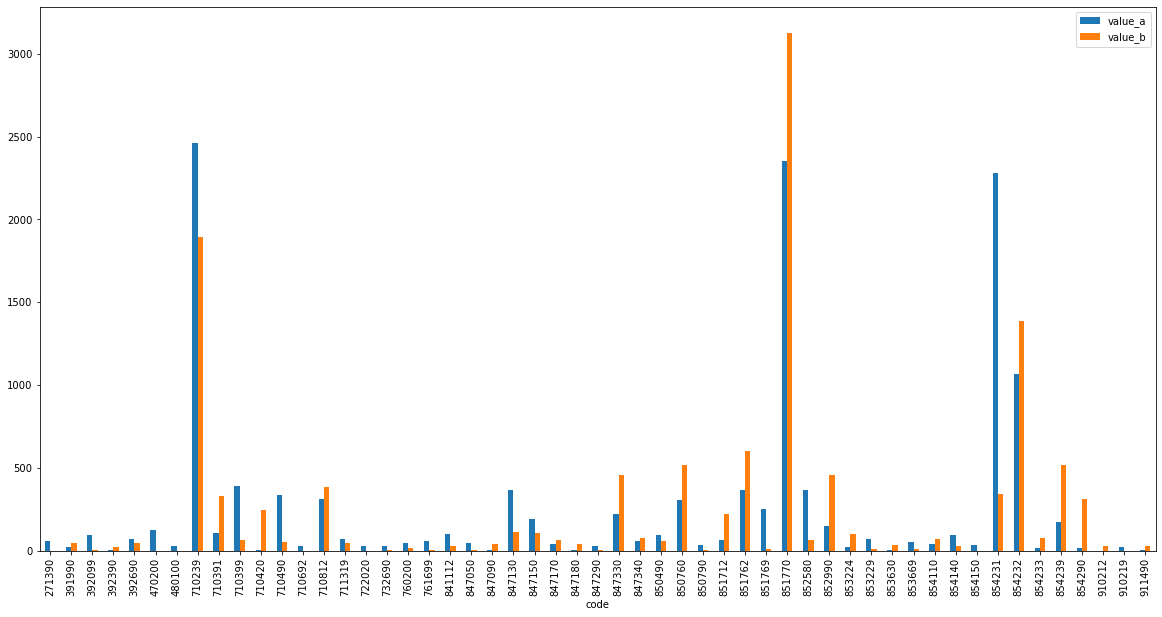

In [15]:
p = df # df2, df4, df6, df
p.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

# Aggregation

In [16]:
df.drop(['quantity_pct', 'value_pct', 'value_diff_abs', 'value_pct_abs', 'QR', 'VR'], axis=1, inplace=True)
df.loc[:,'CTH6'] = df['code']
df.loc[:,'CTH4'] = df['code'].str[0:4]
df.loc[:,'CTH2'] = df['code'].str[0:2]


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [23]:
dfs = df.groupby(['CTH4']).filter(lambda group: len(group) > 1)
dfs['value_a_sum'] = dfs.groupby(['CTH4'])['value_a'].transform('sum')
dfs['value_b_sum'] = dfs.groupby(['CTH4'])['value_b'].transform('sum')
dfs.groupby(['CTH4', 'CTH6']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  \
CTH4 CTH6                                                           
7103 710391        1263   104.64           0   328.28     -223.64   
     710399       41264   391.26           0    63.01      328.25   
7104 710420       22320     1.46       16188   244.58     -243.12   
     710490      151853   337.89      130606    49.29      288.60   
8470 847050      385830    43.32       42984     4.74       38.58   
     847090       17297     1.63      446352    40.95      -39.32   
8471 847130     1390631   362.96      388225   109.83      253.13   
     847150      745007   189.32      404223   103.05       86.27   
     847170      129613    37.47      191449    62.64      -25.17   
     847180        5547     1.37      132023    40.28      -38.91   
8473 847330           0   220.18     4413252   456.88     -236.70   
     847340      654255    55.45     3146684    77.90      -22.45   
8507 850760     5381569   307.03     6961428   518.85     -211.82   
     850790      880362    33.66       60531     5.76       27.90   
8517 851712      102591    60.90      302682   217.78     -156.88   
     851762     1257005   362.91     2029703   598.44     -235.53   
     851769           0   249.18       37475     9.13      240.05   
     851770    27304046  2352.98    19645967  3127.44     -774.46   
8532 853224       85157    21.19      363906    98.41      -77.22   
     853229           0    68.07           0     7.85       60.22   
8536 853630       29127     1.49       41932    35.60      -34.11   
     853669           0    50.76      177734    11.77       38.99   
8541 854110      201267    37.96           0    71.82      -33.86   
     854140           0    92.41           0    30.12       62.29   
     854150           0    32.00           0     0.01       31.99   
8542 854231           0  2282.71           0   340.54     1942.17   
     854232      805063  1064.59           0  1384.77     -320.18   
     854233       10158    12.58           0    72.90      -60.32   
     854239           0   169.96           0   517.82     -347.86   
     854290      111106    17.72      181447   309.04     -291.32   
9102 910212           0     0.14           0    29.63      -29.49   
     910219       75274    20.71           0     0.27       20.44   

             quantity_diff  value_a_sum  value_b_sum  
CTH4 CTH6                                             
7103 710391           1263       495.90       391.29  
     710399          41264       495.90       391.29  
7104 710420           6132       339.35       293.87  
     710490          21247       339.35       293.87  
8470 847050         342846        44.95        45.69  
     847090        -429055        44.95        45.69  
8471 847130        1002406       591.12       315.80  
     847150         340784       591.12       315.80  
     847170         -61836       591.12       315.80  
     847180        -126476       591.12       315.80  
8473 847330       -4413252       275.63       534.78  
     847340       -2492429       275.63       534.78  
8507 850760       -1579859       340.69       524.61  
     850790         819831       340.69       524.61  
8517 851712        -200091      3025.97      3952.79  
     851762        -772698      3025.97      3952.79  
     851769         -37475      3025.97      3952.79  
     851770        7658079      3025.97      3952.79  
8532 853224        -278749        89.26       106.26  
     853229              0        89.26       106.26  
8536 853630         -12805        52.25        47.37  
     853669        -177734        52.25        47.37  
8541 854110         201267       162.37       101.95  
     854140              0       162.37       101.95  
     854150              0       162.37       101.95  
8542 854231              0      3547.56      2625.07  
     854232         805063      3547.56      2625.07  
     854233          10158      3547.56      2625.07  
     854239     

In [27]:
dfs = df.groupby(['CTH2']).filter(lambda group: len(group) > 1)
dfs['value_a_sum'] = dfs.groupby(['CTH2'])['value_a'].transform('sum')
dfs['value_b_sum'] = dfs.groupby(['CTH2'])['value_b'].transform('sum')
dfs.groupby(['CTH2', 'CTH4']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  \
CTH2 CTH4                                                         
39   3919     1225370    20.72      801909    44.02      -23.30   
     3920     2402943    95.37       87973     1.18       94.19   
     3923      412143     3.33     5286727    24.07      -20.74   
     3926    20716911    68.59     3877581    44.25       24.34   
71   7102         570  2463.57           0  1891.66      571.91   
     7103       42527   495.90           0   391.29      104.61   
     7104      174173   339.35      146794   293.87       45.48   
     7106       54612    30.01        1551     0.09       29.92   
     7108        7228   310.40        9183   386.64      -76.24   
     7113         940    69.67         633    43.38       26.29   
76   7602    30954280    48.59    11066643    13.30       35.29   
     7616     1704317    59.97       46169     0.57       59.40   
84   8411       79345    98.84       12990    24.78       74.06   
     8470      403127    44.95      489336    45.69       -0.74   
     8471     2270798   591.12     1115920   315.80      275.32   
     8472     1357660    28.48       28474     0.85       27.63   
     8473      654255   275.63     7559936   534.78     -259.15   
85   8504     1329460    95.34     1091858    59.02       36.32   
     8507     6261931   340.69     7021959   524.61     -183.92   
     8517    28663642  3025.97    22015827  3952.79     -926.82   
     8525     1133055   364.21      147056    66.66      297.55   
     8529           0   145.44     4612076   457.72     -312.28   
     8532       85157    89.26      363906   106.26      -17.00   
     8536       29127    52.25      219666    47.37        4.88   
     8541      201267   162.37           0   101.95       60.42   
     8542      926327  3547.56      181447  2625.07      922.49   
91   9102       75274    20.85           0    29.90       -9.05   
     9114       31179     3.51        6732    29.49      -25.98   

           quantity_diff  value_a_sum  value_b_sum  
CTH2 CTH4                                           
39   3919         423461       188.01       113.52  
     3920        2314970       188.01       113.52  
     3923       -4874584       188.01       113.52  
     3926       16839330       188.01       113.52  
71   7102            570      3708.90      3006.93  
     7103          42527      7417.80      6013.86  
     7104          27379      7417.80      6013.86  
     7106          53061      3708.90      3006.93  
     7108          -1955      3708.90      3006.93  
     7113            307      3708.90      3006.93  
76   7602       19887637       108.56        13.87  
     7616        1658148       108.56        13.87  
84   8411          66355      1039.02       921.90  
     8470         -86209      2078.04      1843.80  
     8471        1154878      4156.08      3687.60  
     8472        1329186      1039.02       921.90  
     8473       -6905681      2078.04      1843.80  
85   8504         237602      7823.09      7941.45  
     8507        -760028     15646.18     15882.90  
     8517        6647815     31292.36     31765.80  
     8525         985999      7823.09      7941.45  
     8529       -4612076      7823.09      7941.45  
     8532        -278749     15646.18     15882.90  
     8536        -190539     15646.18     15882.90  
     8541         201267     23469.27     23824.35  
     8542         744880     39115.45     39707.25  
91   9102          75274        48.72       118.78  
     9114          24447        24.36        59.39